# PROJET : agriAid

- Prévision des rendements des cultures (outils pour aider les agriculteurs à prendre des décisions idéales dans la prévision du rendement des cultures et à améliorer les pratiques agricoles intelligentes qui conduisent à des rendements plus élevés)
DATASET : culture_rendement pris sur Kaggle

# Dataset : yield_df.csv
- yield_df.csv :yield_df.csv est l'ensemble de données final traité par nettoyage et fusion des pesticides, rendement, précipitations et moyenne. température. Yield_df.csv est l'ensemble de données final traité en nettoyant et en fusionnant les pesticides, le rendement, les précipitations et la moyenne. température.

# I - Exploration des données

# I.1 - Objectifs
- comprendre du mieux possible nos datasets /nos données
- Mettre les bases du developpement de la premiere strategie de modelisation de nos deux models

# I.2 - Analyse de forme des datasets 
- Variable target : "Item"
- Lignes et Colonnes : 28242, 8
- Types de variables : Quantitatives (float : 3 - int : 3), Qualitatives (string : 2)
- Analyse des valeurs manquantes : Il y'a tres peu de NaN ou peut-être pas 

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [122]:
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)

In [123]:
yield_df = pd.read_csv("yield_df.csv", sep = ",")
yield_df

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 8 columns]

In [124]:
#- Création d'une copie du dataset à mamipuler
data = yield_df.copy()

In [125]:
data.shape

(28242, 8)

In [126]:
data.dtypes

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

<AxesSubplot:ylabel='None'>

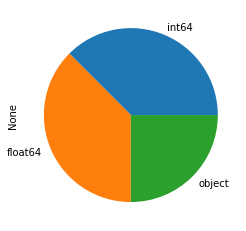

In [127]:
data.dtypes.value_counts().plot.pie()

In [128]:
data.isna()

Unnamed: 0   Area   Item   Year  hg/ha_yield  \
0           False  False  False  False        False   
1           False  False  False  False        False   
2           False  False  False  False        False   
3           False  False  False  False        False   
4           False  False  False  False        False   
...           ...    ...    ...    ...          ...   
28237       False  False  False  False        False   
28238       False  False  False  False        False   
28239       False  False  False  False        False   
28240       False  False  False  False        False   
28241       False  False  False  False        False   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                              False              False     False  
1                              False              False     False  
2                              False              False     False  
3                              False              False     False  
4                              False              False     False  
...                              ...                ...       ...  
28237                          False              False     False  
28238                          False              False     False  
28239                          False              False     False  
28240                          False              False     False  
28241                          False              False     False  

[28242 rows x 8 columns]

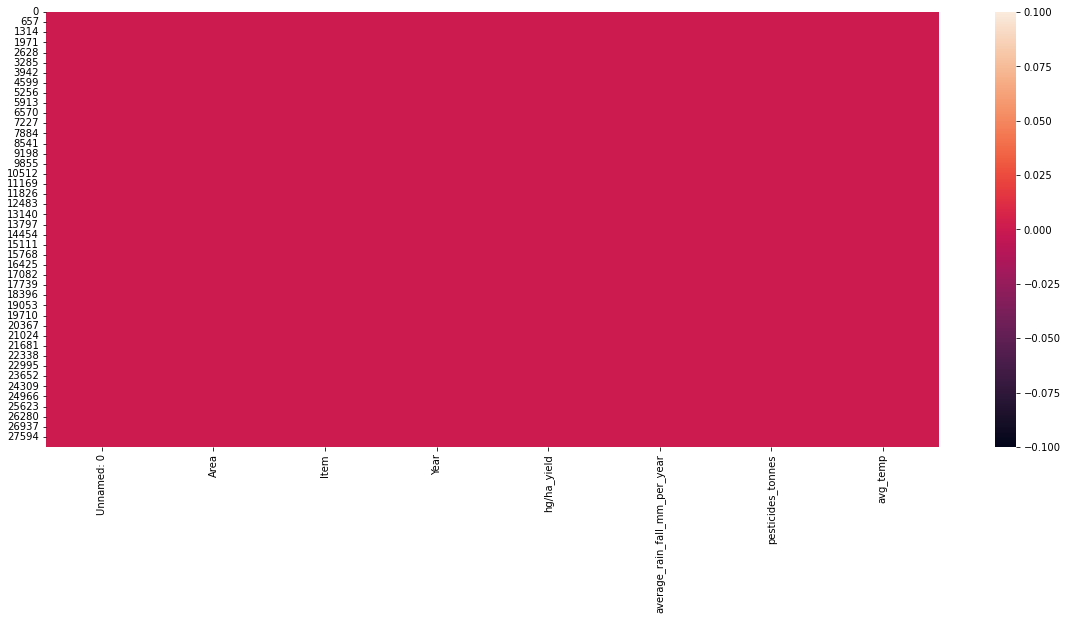

In [129]:
plt.figure(figsize=(20,8))
sns.heatmap(data.isna())
plt.show()

# I.3 - Analyse de fond des datasets
- Visualisation de la target :
    - Examen de la colonne target ("Item") : Potatoes (15,1406%); Maize (14,5917%); Wheat (13,6570%); Rice, paddy (11,9963%); Soybeans (11,4121%); Sorghum (10,7606%); Sweet potatoes (0.10,2330%); Cassava (7,2410%); Yams (2,9991%); Plantains and others (1,9687%)
    - Plusieurs classes déséquilibré pour ce probleme et dont on pourra utiliser Le F1-score et La précision comme metrique (avec un probleme de classification)
- Signification des variables :
    - Variable continues de type float :
        - Deja on remarque que toutes nos données ne sont pas centré en zero et n'ont pa sl'aire d'avoir un ecart-type egale à 1 ce qui nous laisse imediatementque ces données ne sont pas standardisé ainsi elles ne suivent pas une distribution gaussienne centré reduite
        - On peut aussi voir que nos variables suivent une distribution asymetrique
    - Variable continues de type int : La remarque est la meme que en haut
    - Variables categorielles de type objet : plusieur type de données a exploiter dans la variables "Item"
- Relation variables / target : 
    - Etant donné que nous voulons predire les cultures (10 cultures que nous avons a notre disposition) en fonction des caracteristiques d'etat pphysique, il est judicieux de diviser en dix sou groupe afin de pouvoir voir les rélations qui y sont :
        - Il semblerai que la temperature favorise la culture des Plantain et autres
        - L'utilisation en petite quantité des pesticides favorise de nombreuse cultures

In [130]:
data = data.drop(["Unnamed: 0"], axis = 1)
data

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 7 columns]

In [131]:
data["Item"].value_counts(normalize=True)

Potatoes                0.151406
Maize                   0.145917
Wheat                   0.136570
Rice, paddy             0.119963
Soybeans                0.114121
Sorghum                 0.107606
Sweet potatoes          0.102330
Cassava                 0.072410
Yams                    0.029991
Plantains and others    0.019687
Name: Item, dtype: float64

### Signification :  histogramme

### float

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

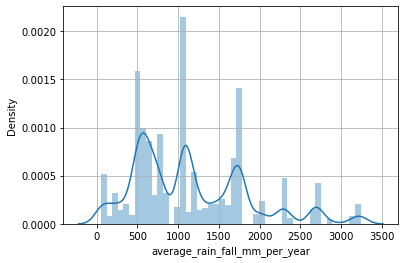

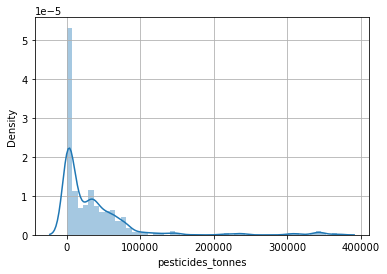

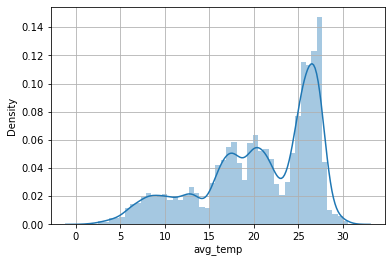

In [132]:
for var in data.select_dtypes("float"):
    plt.figure()
    sns.distplot(data[var])
    plt.grid()
plt.show()

### Integer

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


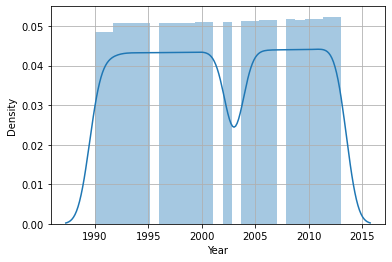

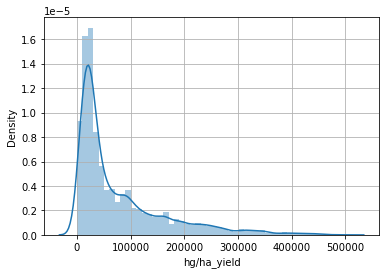

In [133]:
for var in data.select_dtypes("int"):
    plt.figure()
    sns.distplot(data[var])
    plt.grid()
plt.show()

### categorielle

In [134]:
for var in data.select_dtypes("object"):
    print(f"-> {var}\n")
    print(data[var].unique())
    print("\n\n\n")

-> Area

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'T

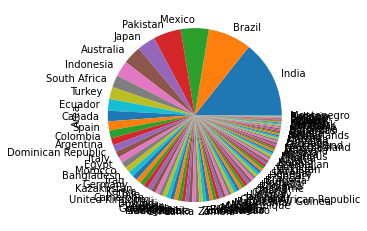

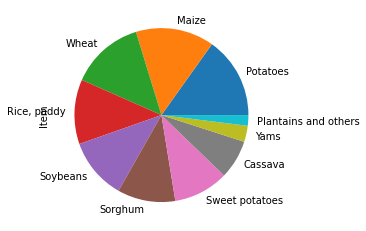

In [135]:
for var in data.select_dtypes("object"):
    plt.figure()
    data[var].value_counts().plot.pie()

### Relation variables target

#### sous-ensembles des cultures

In [136]:
potatoes_df = data[data['Item'] == "Potatoes"]
maize_df = data[data['Item'] == "Maize"]
wheat_df = data[data['Item'] == "Wheat"]
rice_paddy_df = data[data['Item'] == "Rice, paddy"]
soybeans_df = data[data['Item'] == "Soybeans"]
sorghum_df = data[data['Item'] == "Sorghum"]
sweet_potatoes_df = data[data['Item'] == "Sweet potatoes"]
cassava_df = data[data['Item'] == "Cassava"]
yams_df = data[data['Item'] == "Yams"]
plantains_and_others_df = data[data['Item'] == "Plantains and others"]

In [137]:
data.columns[2:]

Index(['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

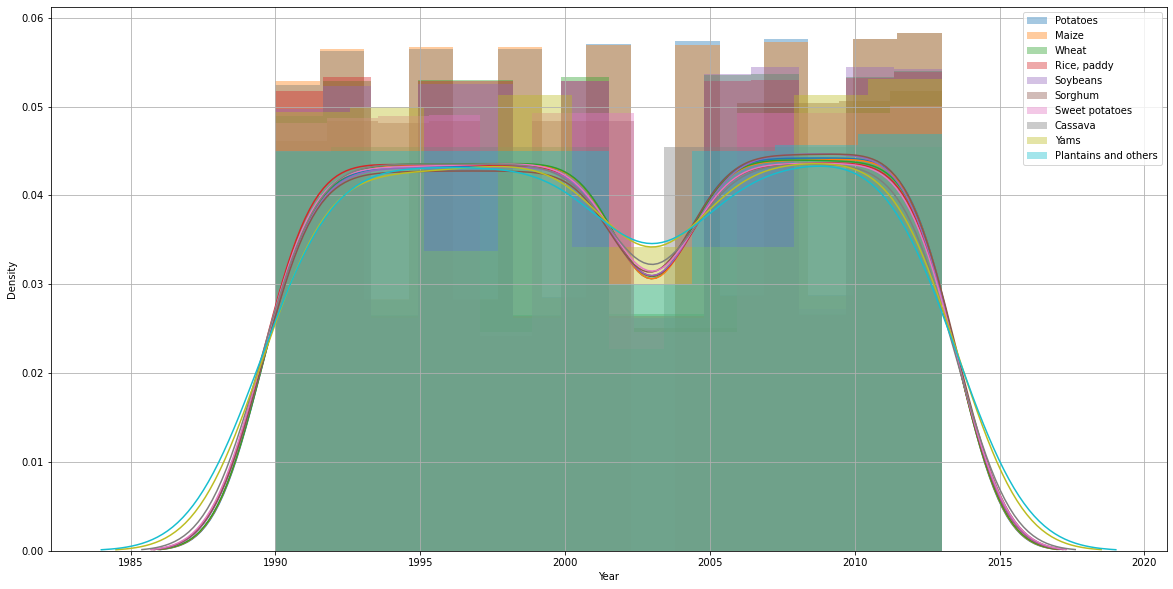

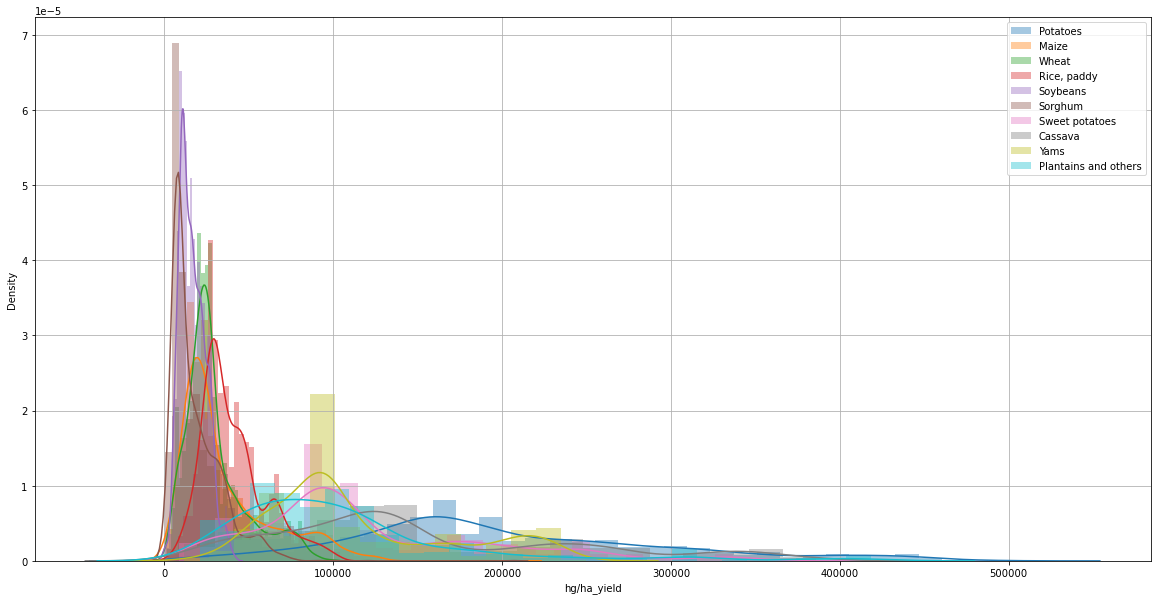

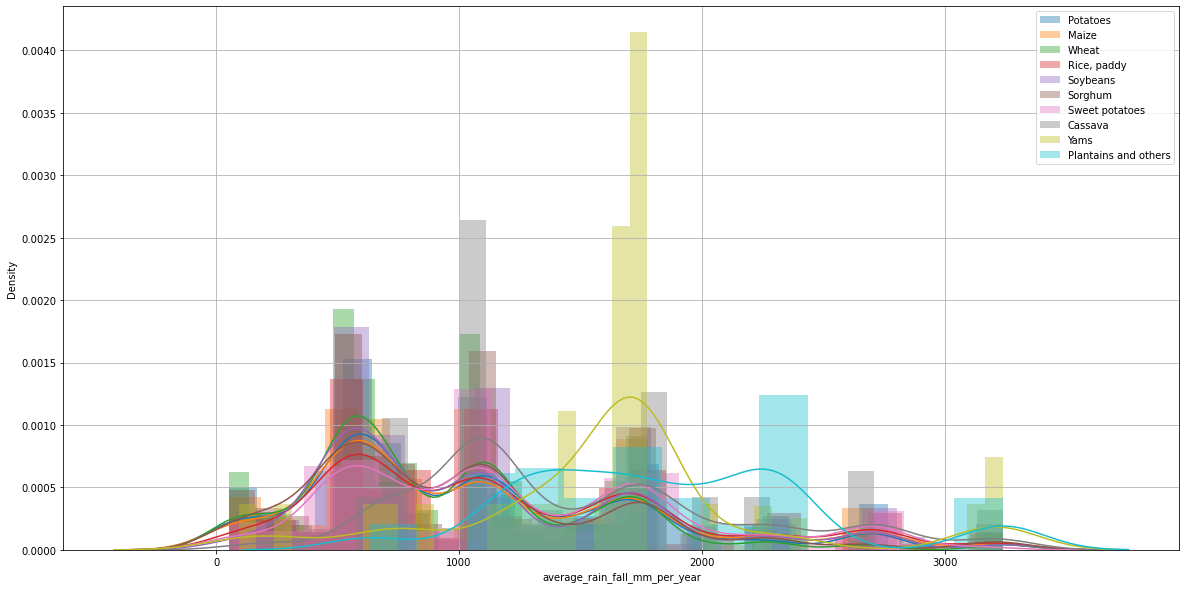

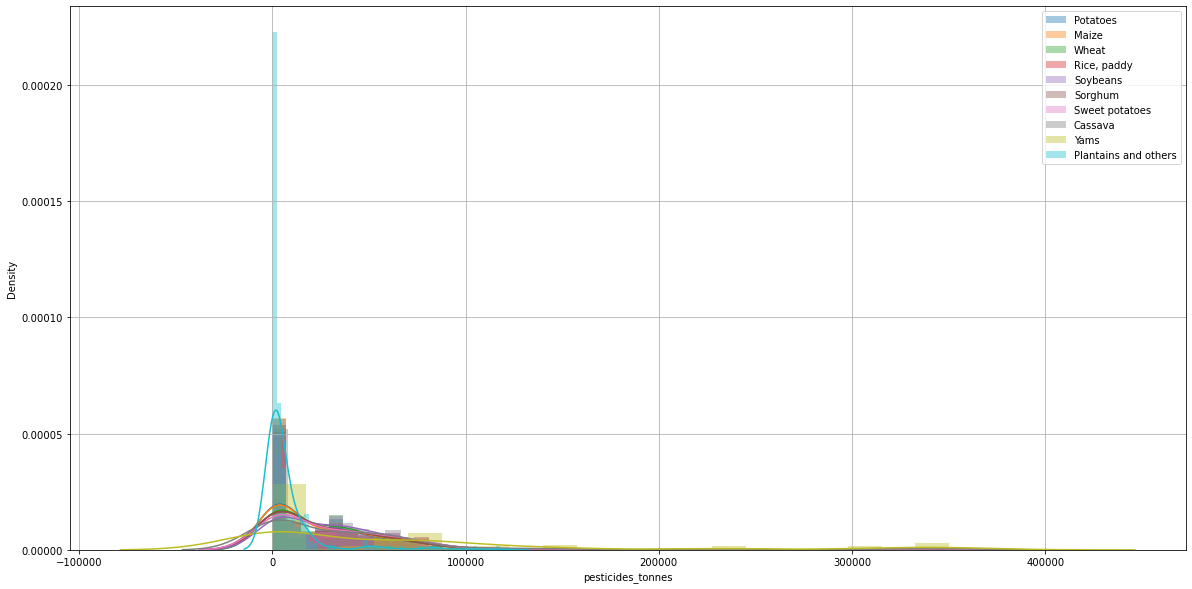

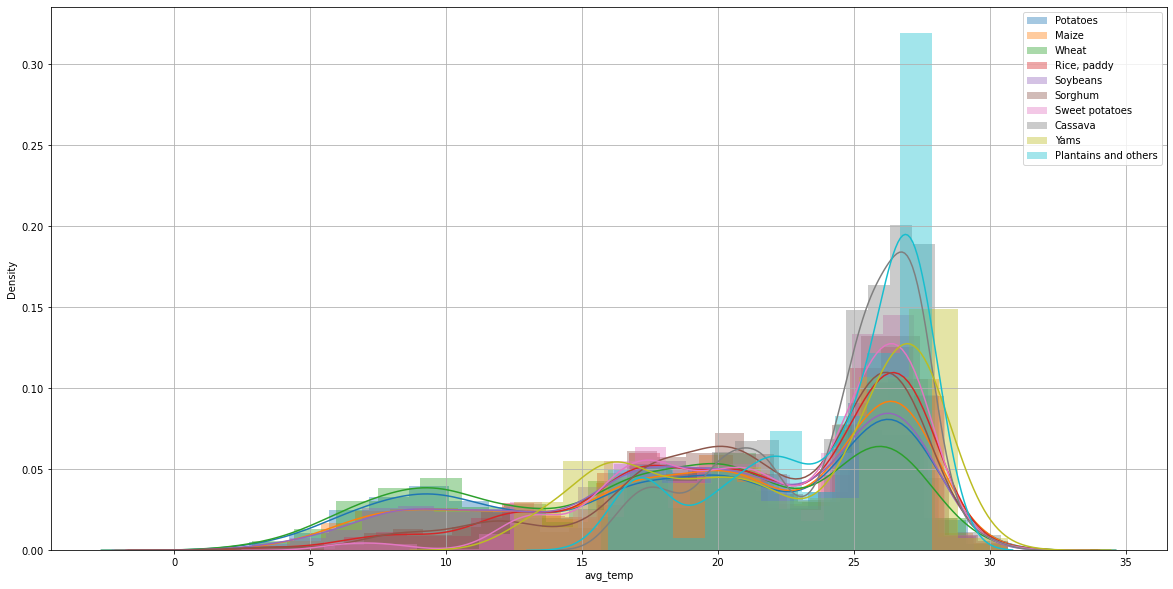

In [138]:
for var in data[data.columns[2:]].columns:
    plt.figure(figsize=(20, 10))
    sns.distplot(potatoes_df[var], label = "Potatoes") 
    sns.distplot(maize_df[var], label = "Maize")
    sns.distplot(wheat_df[var], label = "Wheat") 
    sns.distplot(rice_paddy_df[var], label = "Rice, paddy")
    sns.distplot(soybeans_df[var], label = "Soybeans") 
    sns.distplot(sorghum_df[var], label = "Sorghum")
    sns.distplot(sweet_potatoes_df[var], label = "Sweet potatoes") 
    sns.distplot(cassava_df[var], label = "Cassava")
    sns.distplot(yams_df[var], label = "Yams") 
    sns.distplot(plantains_and_others_df[var], label = "Plantains and others")
    plt.grid()
    plt.legend()

### Relation year / target

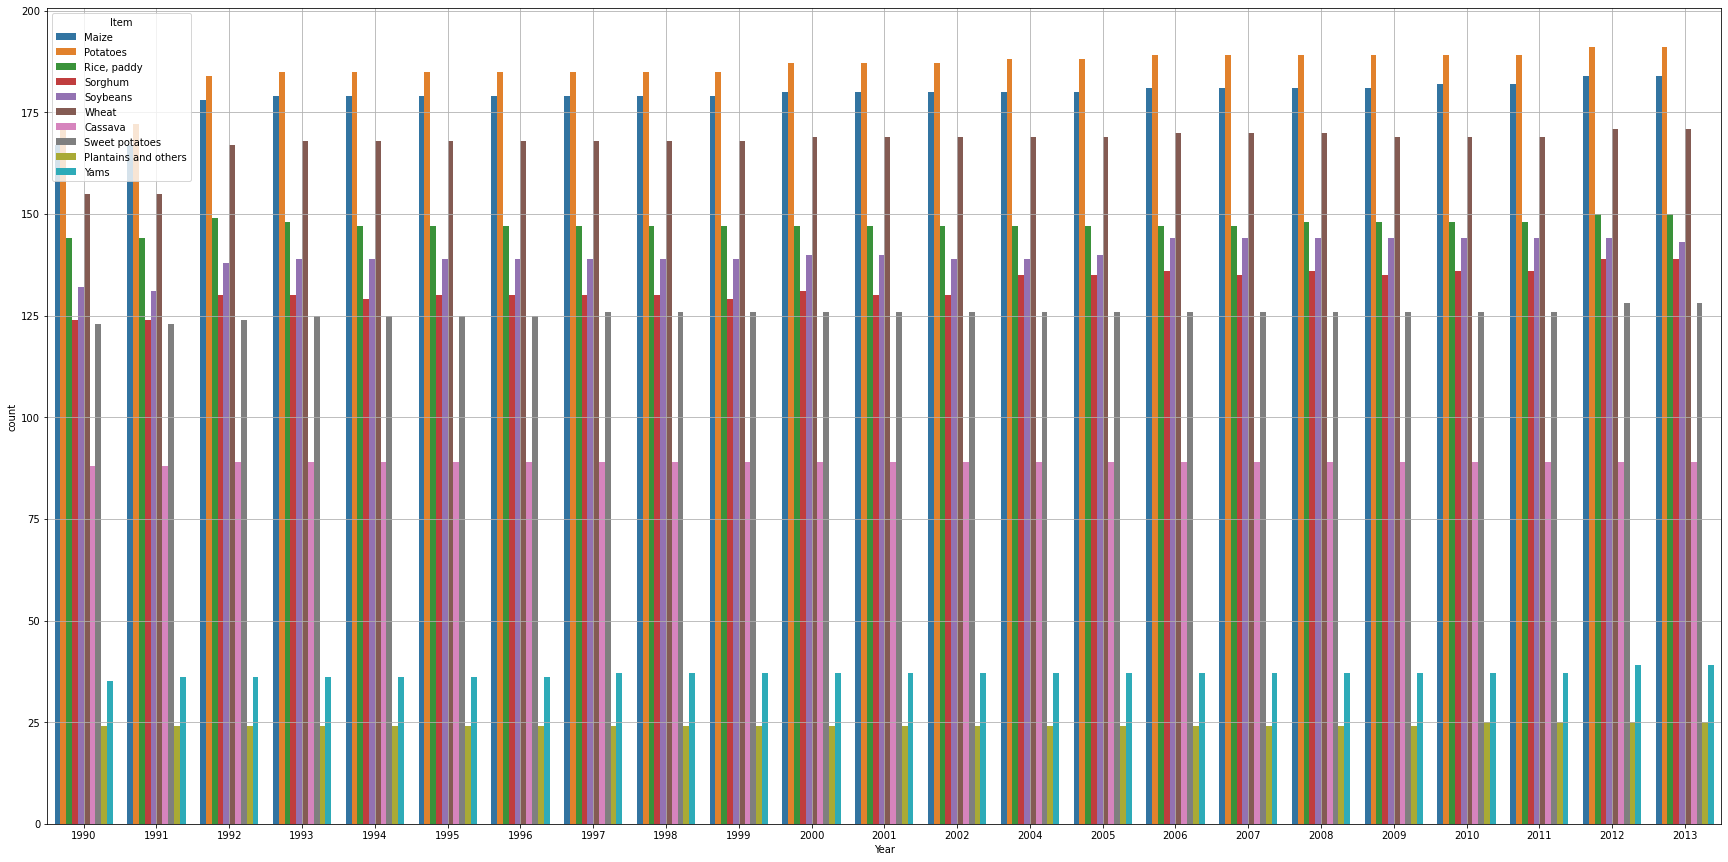

In [139]:
plt.figure(figsize=(30, 15))
sns.countplot(x="Year", hue="Item", data=data)
plt.grid()
plt.show()

### categoriel

In [140]:
pd.crosstab(data["Item"], data["Area"])

Area                  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
Item                                                                            
Cassava                     0        0      23         46        0          0   
Maize                      23       23      23         46       21        138   
Plantains and others        0        0       0          0        0          0   
Potatoes                   23       23      23         46       21        138   
Rice, paddy                 4       23      23         46        0        138   
Sorghum                     3       22      13         46        0        138   
Soybeans                   23        0      13         46        0        138   
Sweet potatoes              0        0      23         46        0        138   
Wheat                      23       23      23         46       21        138   
Yams                        0        0       0          0        0          0   

Area                  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  \
Item                                                                      
Cassava                     0           0       21        0           0   
Maize                      23          21       21        0          46   
Plantains and others        0           0        4        0           0   
Potatoes                   23          21        0       23          46   
Rice, paddy                 0          21        0        0          46   
Sorghum                     4          12        0        0          46   
Soybeans                   23          20        0        0          18   
Sweet potatoes              0           0       21        6          46   
Wheat                      23          21        0        0          46   
Yams                        0           0        0        0           0   

Area                  Belarus  Belgium  Botswana  Brazil  Bulgaria  \
Item                                                                 
Cassava                     0        0         0     253         0   
Maize                      21       13        23     253        23   
Plantains and others        0        0         0       0         0   
Potatoes                   21       13         0     253        23   
Rice, paddy                 0        0         0     253        23   
Sorghum                     0        0        23     253        23   
Soybeans                    0        0         0     253        23   
Sweet potatoes              0        0         0     253         0   
Wheat                      21       13        18     253        23   
Yams                        0        0         0     253         0   

Area                  Burkina Faso  Burundi  Cameroon  Canada  \
Item                                                            
Cassava                         23       23        23       0   
Maize                           23       23        23     138   
Plantains and others             0        0        23       0   
Potatoes                        23       23        23     138   
Rice, paddy                     23       23        23       0   
Sorghum                         23       23        23       0   
Soybeans                        23       23        23     138   
Sweet potatoes                  23       23        23       0   
Wheat                            0       23        23     138   
Yams                            23       23        23       0   

Area                  Central African Republic  Chile  Colombia  Croatia  \
Item                                                                       
Cassava                                     23      0        46        0   
Maize                                       23     46        46       21   
Plantains and others                        23      0        46        0   
Potatoes                                    23     46        46       21   
Rice, paddy                                 23  

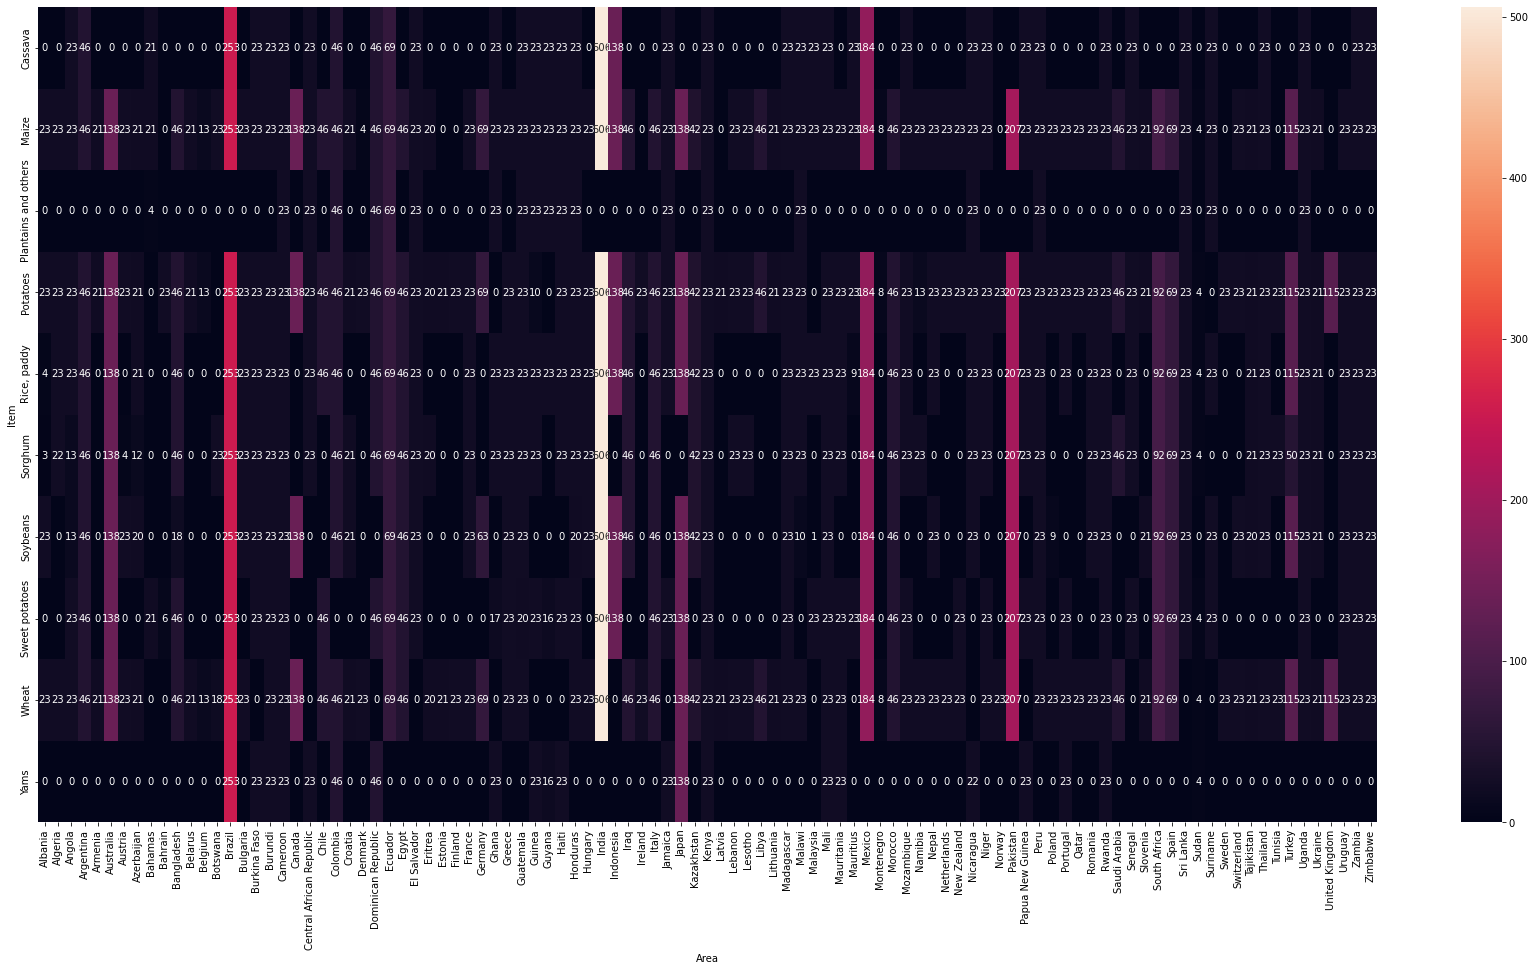

In [141]:
plt.figure(figsize=(30,15))
sns.heatmap(pd.crosstab(data["Item"], data["Area"]), annot=True, fmt="d")
plt.show()

# I.4. Conclusion
- Il y'a tres peu de données manquantes
- Par la suite standardiser les données ou utiliser les models qui sandardise
- On a plusieurs groupes : pas tous informateurs, mais qui semblerai interessants

# II - Analyse plus détaillé 

# II.1 - Rélations variables / variables
- Etat metherologique :
    - On peut deja remarquer que : average_rain_fall_mm_per_year (Moyenne des précipitations en mm par an) et avg_temp (Température en °C des température) sont les plus fortement corrélé entre eux.
- NaN analyse : Une analyse approfondi nous montre qu'on a pas trop de probleme avec les données manquantes

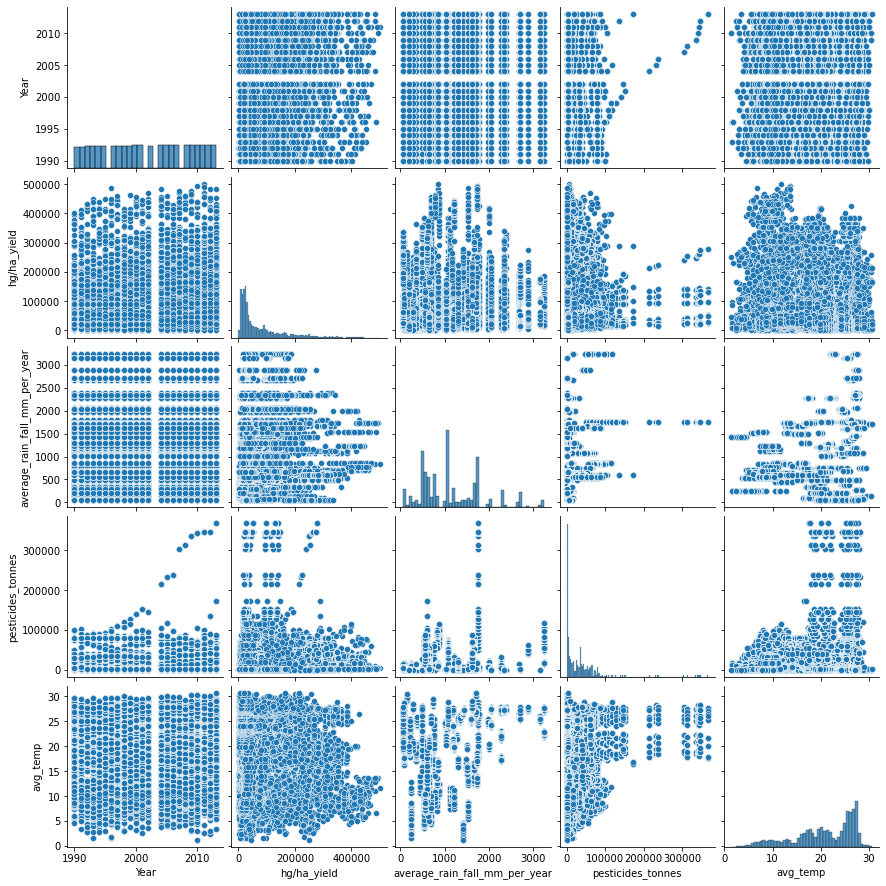

In [142]:
sns.pairplot(data)

<Figure size 864x576 with 0 Axes>

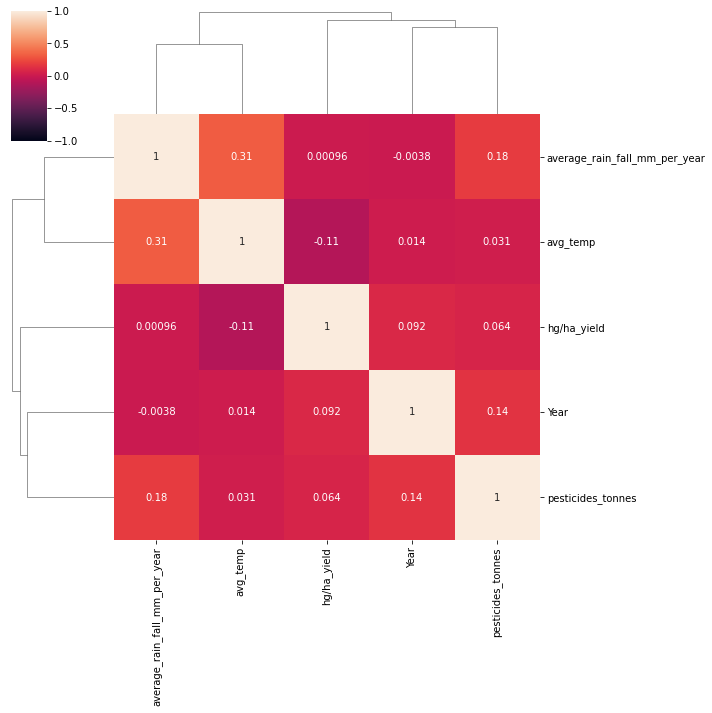

In [143]:
plt.figure(figsize=(12,8))
sns.clustermap(data.corr(), vmin = -1, vmax = +1, annot = True)
plt.show()

### Annees - autres variable - Target
##### visualiser les droites de regression entre les varaibles
- On peut constate qu'aucune de nos droites de regression n'est supperposé les uns au autres ce qui est une tres bonne chose
- On a tres et tres peu de Outliers (d'ailleurs il n'y en a que sur le graphe des pesticide et tres peu)
- Mais on se rend aussi compte a parti de ces graphes qu'il y'a une sorte de regressione entre toute ces variables excepte l'igniame et le plantain au niveau des pesticides

<Figure size 864x576 with 0 Axes>

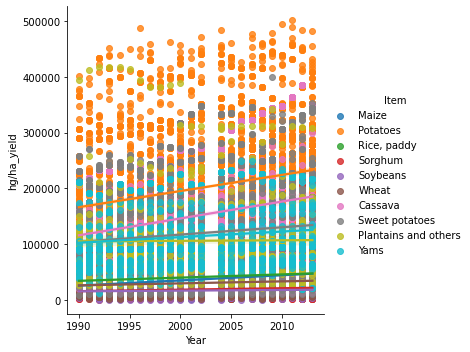

<Figure size 864x576 with 0 Axes>

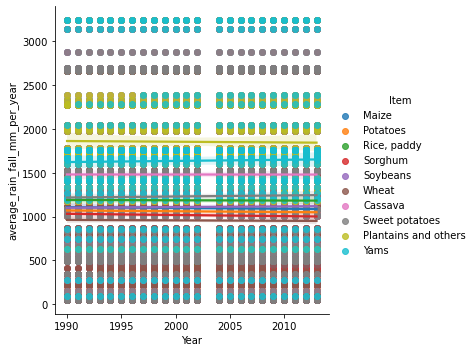

<Figure size 864x576 with 0 Axes>

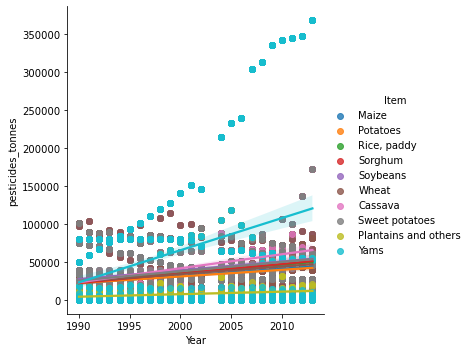

<Figure size 864x576 with 0 Axes>

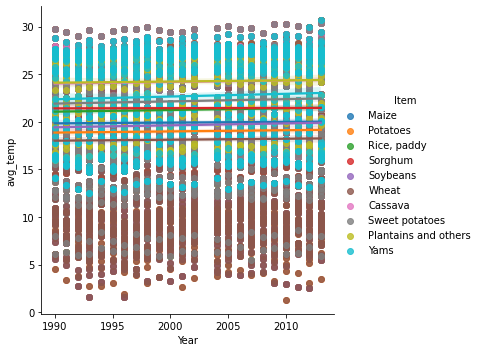

In [144]:
for var in data[data.columns[3:]].columns:
    plt.figure(figsize=(12,8))
    sns.lmplot(x="Year", y=var, hue="Item", data=data)
    plt.show()

In [145]:
data.corr()

Year  hg/ha_yield  \
Year                           1.000000     0.091630   
hg/ha_yield                    0.091630     1.000000   
average_rain_fall_mm_per_year -0.003798     0.000962   
pesticides_tonnes              0.140930     0.064085   
avg_temp                       0.014409    -0.114777   

                               average_rain_fall_mm_per_year  \
Year                                               -0.003798   
hg/ha_yield                                         0.000962   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.180984   
avg_temp                                            0.313040   

                               pesticides_tonnes  avg_temp  
Year                                    0.140930  0.014409  
hg/ha_yield                             0.064085 -0.114777  
average_rain_fall_mm_per_year           0.180984  0.313040  
pesticides_tonnes                       1.000000  0.030946  
avg_temp                                0.030946  1.000000

# II.2 - Hypothèse null (H0)
- H1 : Les temperatures semblent lié aux cultures des Plantain et autres
    - H0 = Les temperatures sont siginficative pour la culture de plantain et autres
    - R0 : H0 Rejetée
    - C0 : Les temperatures ne sont pas necessairement siginficative pour la culture de plantain et autres
- H2 : L'utilisation en petite quantité des pesticides favorise de nombreuse cultures
    - H0 = L'utilisation d'un taux moyen des pesticides favorise de nombreuse cultures
    - R0 : H0 Rejetée
    - C0 : L'utilisation d'un taux moyen des pesticides favorise pas necessairement les cultures

## Test de Studens ou de KHI2(chi2)

Le teste de studens est un test qui permet de verifeir si la moyenne entre deux distributions est significativement differente, et pour ca, on emet une hypothese nulle.
- Le principe est simple : Elle va etre d'essayer de regetter cette hypothese et pour ca, on va definir un seuil de probabilité alpha qui en generale est aux allentour de 2% ou 5%, puis on calcule une valeur p avec notre test de studens ou notre teste de khi2 est si la valeur est inferieur a notre seuil de probabilite alpha, alors on peut regete cette hypothese sinon on ne peut pas regeter cette hypothese.
- Les ensemble doivent avoir presque le meme nombre d'element

In [146]:
from scipy.stats import chi2_contingency

In [147]:
balanced_potatoes_df = potatoes_df.sample(plantains_and_others_df.shape[0])
balanced_maize_df = maize_df.sample(plantains_and_others_df.shape[0])
balanced_wheat_df = wheat_df.sample(plantains_and_others_df.shape[0])
balanced_rice_paddy_df = rice_paddy_df.sample(plantains_and_others_df.shape[0])
balanced_soybeans_df = soybeans_df.sample(plantains_and_others_df.shape[0])
balanced_sorghum_df = sorghum_df.sample(plantains_and_others_df.shape[0])
balanced_sweet_potatoes_df = sweet_potatoes_df.sample(plantains_and_others_df.shape[0])
balanced_cassava_df = cassava_df.sample(plantains_and_others_df.shape[0])
balanced_yams_df = yams_df.sample(plantains_and_others_df.shape[0])
balanced_plantains_and_others_df = plantains_and_others_df

In [148]:
culture = {
    "Potatoes": balanced_potatoes_df,
    "Maize": balanced_maize_df,
    "Wheat": balanced_wheat_df,
    "Rice_paddy": balanced_rice_paddy_df,
    "Soybeans": balanced_soybeans_df,
    "Sorghum": balanced_sorghum_df,
    "Sweet_potatoes": balanced_sweet_potatoes_df,
    "Cassava": balanced_cassava_df,
    "Yams": balanced_yams_df,
    "Plantains_and_others": balanced_plantains_and_others_df
}

In [149]:
def khi2_test(data):
    beta = 0.05
    p = chi2_contingency(pd.crosstab(data["Item"], data["pesticides_tonnes"]))[1]
    if p < beta:
        return "H0 Approuvée"
    else:
        return "H0 Rejetée"

In [151]:
for key, value in culture.items():
    print(f"{key :-<50} {khi2_test(value)}")

Potatoes------------------------------------------ H0 Rejetée
Maize--------------------------------------------- H0 Rejetée
Wheat--------------------------------------------- H0 Rejetée
Rice_paddy---------------------------------------- H0 Rejetée
Soybeans------------------------------------------ H0 Rejetée
Sorghum------------------------------------------- H0 Rejetée
Sweet_potatoes------------------------------------ H0 Rejetée
Cassava------------------------------------------- H0 Rejetée
Yams---------------------------------------------- H0 Rejetée
Plantains_and_others------------------------------ H0 Rejetée


# II.3 - Conclusion
- Il y'a pas de données manquante
- Par la suite standardiser les données ou utilise des models qui standardisent
- Ce dataset et bien propre: Il semblerai que la personne qui l'a posté l'a traité au prealable. Mais pour notre etude nous conservons les variables ("Item", "hg/ha_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp")

# III - Pre-processing 

# Objectifs

- Mettres nos données dans un format propice au developpement de notre model de machine learning 
    - Train / Test
    - Encodage
    - Netoyage des NaN s'ils existe
- Mais egalement avoir le dataset le plus propre possible afin d'ameliore la perfomance de notre model
    - Premier model d'evaluation
    - Procedures d'evaluation

In [400]:
#copy du dataset et netoyage des etude fait à l'analyse
df = yield_df.copy()
df = df.drop(["Unnamed: 0", "Area", "Year"], axis = 1)
df

Item  hg/ha_yield  average_rain_fall_mm_per_year  \
0               Maize        36613                         1485.0   
1            Potatoes        66667                         1485.0   
2         Rice, paddy        23333                         1485.0   
3             Sorghum        12500                         1485.0   
4            Soybeans         7000                         1485.0   
...               ...          ...                            ...   
28237     Rice, paddy        22581                          657.0   
28238         Sorghum         3066                          657.0   
28239        Soybeans        13142                          657.0   
28240  Sweet potatoes        22222                          657.0   
28241           Wheat        22888                          657.0   

       pesticides_tonnes  avg_temp  
0                 121.00     16.37  
1                 121.00     16.37  
2                 121.00     16.37  
3                 121.00     16.37  
4                 121.00     16.37  
...                  ...       ...  
28237            2550.07     19.76  
28238            2550.07     19.76  
28239            2550.07     19.76  
28240            2550.07     19.76  
28241            2550.07     19.76  

[28242 rows x 5 columns]

### Train / Test

In [401]:
from sklearn.model_selection import train_test_split

In [402]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)

In [403]:
trainset["Item"].value_counts()

Potatoes                3404
Maize                   3292
Wheat                   3080
Rice, paddy             2716
Soybeans                2595
Sorghum                 2445
Sweet potatoes          2309
Cassava                 1604
Yams                     686
Plantains and others     462
Name: Item, dtype: int64

In [404]:
testset["Item"].value_counts()

Potatoes                872
Maize                   829
Wheat                   777
Rice, paddy             672
Soybeans                628
Sorghum                 594
Sweet potatoes          581
Cassava                 441
Yams                    161
Plantains and others     94
Name: Item, dtype: int64

### Encodage

In [405]:
def encodage(df):
    crops = {
        "Potatoes": 0,
        "Maize": 1,
        "Wheat": 2,
        "Rice, paddy": 3,
        "Soybeans": 4,
        "Sorghum": 5,
        "Sweet potatoes": 6,
        "Cassava": 7,
        "Yams": 8,
        "Plantains and others": 9
    }
    df['Item'] = df['Item'].map(crops)
    return df

### Netoyage oy imputation des NaN

In [406]:
def imputation(df):
    df = df.fillna(-999)
    #df =  df.dropna(axis = 0)
    return df

### fonction du pre-processing

In [407]:
def preprocessing(df):
    df = imputation(encodage(df))
    X = df.drop("Item", axis = 1)
    y = df["Item"]
    return X, y

### Format approprier des données

In [408]:
X_train, y_train = preprocessing(trainset)

In [409]:
X_test, y_test = preprocessing(testset)

### Premier model

In [410]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [411]:
first_model = DecisionTreeClassifier()

### Procedures d'evaluation

In [412]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))


In [413]:
def evaluation_threat(model):
    evaluation(model)
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring="accuracy",
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = "train score")
    plt.plot(N, val_score.mean(axis = 1), label = "validation score")
    plt.legend()
    plt.grid()
    plt.show()

### Test d'evaluation

In [414]:
evaluation(model=first_model)

[[778   6   1  10   1   1  39  13   8  15]
 [  5 654  55  35  27  35  14   3   0   1]
 [  3  44 658  17  23  26   4   2   0   0]
 [  8  51  14 551   5  20   5  10   6   2]
 [  0  17  20   7 543  37   2   1   0   1]
 [  4  33  32  14  34 471   3   3   0   0]
 [ 27   7   4   3   1   2 511  16   7   3]
 [ 25   6   0   7   0   2  20 360  10  11]
 [  9   0   1   3   0   0  14  10 119   5]
 [ 10   0   0   1   0   0   2   8   2  71]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       872
           1       0.80      0.79      0.79       829
           2       0.84      0.85      0.84       777
           3       0.85      0.82      0.83       672
           4       0.86      0.86      0.86       628
           5       0.79      0.79      0.79       594
           6       0.83      0.88      0.86       581
           7       0.85      0.82      0.83       441
           8       0.78      0.74      0.76       161
           9       0.65     

[[787   3   1  10   1   1  37  11   6  15]
 [  8 652  55  36  25  37  13   2   0   1]
 [  2  39 662  21  20  30   3   0   0   0]
 [  8  51  14 553   5  17   5  10   7   2]
 [  0  19  21   8 538  38   2   1   0   1]
 [  4  34  30  20  36 464   3   3   0   0]
 [ 29   8   6   4   1   1 509  11   8   4]
 [ 29   8   0   7   0   1  19 355  11  11]
 [  9   0   2   3   0   0  12  11 120   4]
 [ 10   0   0   1   0   0   1   7   2  73]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       872
           1       0.80      0.79      0.79       829
           2       0.84      0.85      0.84       777
           3       0.83      0.82      0.83       672
           4       0.86      0.86      0.86       628
           5       0.79      0.78      0.78       594
           6       0.84      0.88      0.86       581
           7       0.86      0.80      0.83       441
           8       0.78      0.75      0.76       161
           9       0.66     

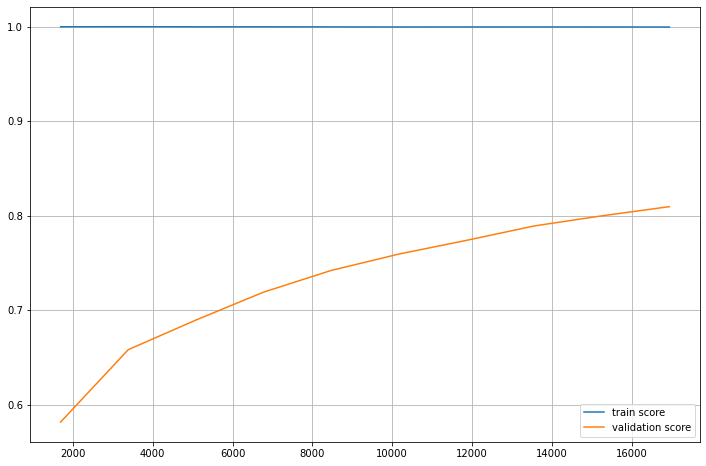

In [415]:
evaluation_threat(model=first_model)

# Remarque
- On remarque que notre model est en overfiting

<AxesSubplot:>

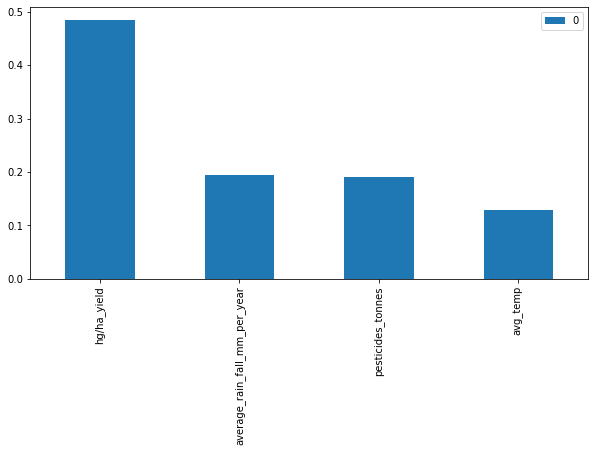

In [416]:
pd.DataFrame(first_model.feature_importances_, index = X_train.columns).plot.bar(figsize=(10,5)) 

# IV - Modelisation

In [417]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## Differents models

In [418]:
preprocessor = make_pipeline(PolynomialFeatures(1, include_bias=False), SelectKBest(f_classif, k=4))

In [419]:
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [420]:
list_of_models = {
    "DecisionTree" : DecisionTree,
    "RandomForest" : RandomForest, 
    "AdaBoost" : AdaBoost, 
    "SVM" : SVM,
    "KNN" : KNN
}

# IV.1 - Test des differements models

In [421]:
for name, model in list_of_models.items():
    print(f"---> {name}\n")
    evaluation(model)
    print("\n\n\n")

---> DecisionTree

[[780   6   1  10   1   1  38  10  10  15]
 [  5 648  53  41  21  43  15   2   0   1]
 [  4  51 653  22  22  23   2   0   0   0]
 [  6  54  12 555   5  16   6  10   7   1]
 [  0  20  20   9 539  36   2   1   0   1]
 [  3  38  29  16  34 468   3   3   0   0]
 [ 24   7   5   3   1   1 511  17   7   5]
 [ 24   6   0   9   0   2  17 356  13  14]
 [  9   0   1   3   0   0  13   9 121   5]
 [  7   0   0   1   0   0   2   7   2  75]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       872
           1       0.78      0.78      0.78       829
           2       0.84      0.84      0.84       777
           3       0.83      0.83      0.83       672
           4       0.87      0.86      0.86       628
           5       0.79      0.79      0.79       594
           6       0.84      0.88      0.86       581
           7       0.86      0.81      0.83       441
           8       0.76      0.75      0.75       161
         

# Models
- **DecisionTreeClassifier** : Les arbres de décision sont un modèle populaire, utilisé dans la recherche opérationnelle, la planification stratégique et le Machine Learning. Chaque point est appelé un nœud. Plus vous avez de nœuds, plus votre arbre décisionnel sera précis (en général). Les derniers nœuds de l’arbre décisionnel, où une décision est prise, sont appelés les « feuilles » de l’arbre. Les arbres décisionnels sont intuitifs et faciles à construire, mais ils font un peu défaut lorsqu’on parle de précision ou d’exactitude.
- **RandomForestClassifier** : L'algorithme de forêt aléatoire est une extension de la méthode de bagging car il utilise à la fois le bagging et le caractère aléatoire des caractéristiques pour créer une forêt non corrélée d'arbres de décision. Le caractère aléatoire des caractéristiques, également connu sous le nom de mise en sac de caractéristiques ou « la méthode du sous-espace aléatoire », génère un sous-ensemble aléatoire de caractéristiques, ce qui garantit une faible corrélation entre les arbres de décision. Il s'agit d'une différence essentielle entre les arbres de décision et les forêts aléatoires. Alors que les arbres de décision prennent en compte toutes les divisions d'entités possibles, les forêts aléatoires ne sélectionnent qu'un sous-ensemble de ces entités.
- **AdaBoostClassifier** :Ada-boost ou Adaptive Boosting est l'un des classificateurs de renforcement d'ensemble proposé par Yoav Freund et Robert Schapire en 1996. Il combine plusieurs classificateurs pour augmenter la précision des classificateurs. AdaBoost est une méthode d'ensemble itérative. Le classificateur AdaBoost crée un classificateur puissant en combinant plusieurs classificateurs peu performants afin d'obtenir un classificateur puissant de haute précision. Le concept de base derrière Adaboost est de définir les poids des classificateurs et de former l'échantillon de données à chaque itération de manière à garantir des prédictions précises d'observations inhabituelles. Tout algorithme d'apprentissage automatique peut être utilisé comme classificateur de base s'il accepte des pondérations sur l'ensemble d'apprentissage.
- **SVC (SVM)** : Un classificateur SVM, ou classificateur de machine à vecteurs de support, est un type d'algorithme d'apprentissage automatique qui peut être utilisé pour analyser et classer des données. Une machine à vecteurs de support est un algorithme d'apprentissage automatique supervisé qui peut être utilisé à la fois pour des tâches de classification et de régression. Le classificateur de machine à vecteurs de support fonctionne en trouvant l'hyperplan qui maximise la marge entre les deux classes. L'algorithme de la machine à vecteurs de support est également connu sous le nom de classificateur à marge maximale. La machine à vecteurs de support est un outil puissant pour l'apprentissage automatique et a été largement utilisée dans de nombreuses tâches telles que la reconnaissance des chiffres manuscrits, la reconnaissance des expressions faciales et la classification des textes. La machine à vecteurs de support présente de nombreux avantages par rapport aux autres algorithmes d'apprentissage automatique, tels que la robustesse au bruit et la capacité à gérer de grands ensembles de données.
- **KNeighborsClassifier** : KNN est l'une des formes les plus simples d'algorithmes d'apprentissage automatique principalement utilisés pour la classification. Il classe le point de données sur la façon dont son voisin est classé. KNN classe les nouveaux points de données en fonction de la mesure de similarité des points de données précédemment stockés. Par exemple, si nous avons un ensemble de données de tomates et de bananes. KNN stockera des mesures similaires comme la forme et la couleur. Lorsqu'un nouvel objet arrive, il vérifie sa similitude avec la couleur (rouge ou jaune) et la forme. Le K dans KNN représente le nombre de voisins les plus proches que nous avons utilisés pour classer les nouveaux points de données.

# IV.2 - Choix du model
- Le model ainsi choisir est DecisionTreeClassifier (les abres de decision) en raison du nombre de types de données que nous avons dans la target

In [424]:
model = DecisionTree

[[780   6   1  10   1   1  38  10  10  15]
 [  5 648  53  41  21  43  15   2   0   1]
 [  4  51 653  22  22  23   2   0   0   0]
 [  6  54  12 555   5  16   6  10   7   1]
 [  0  20  20   9 539  36   2   1   0   1]
 [  3  38  29  16  34 468   3   3   0   0]
 [ 24   7   5   3   1   1 511  17   7   5]
 [ 24   6   0   9   0   2  17 356  13  14]
 [  9   0   1   3   0   0  13   9 121   5]
 [  7   0   0   1   0   0   2   7   2  75]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       872
           1       0.78      0.78      0.78       829
           2       0.84      0.84      0.84       777
           3       0.83      0.83      0.83       672
           4       0.87      0.86      0.86       628
           5       0.79      0.79      0.79       594
           6       0.84      0.88      0.86       581
           7       0.86      0.81      0.83       441
           8       0.76      0.75      0.75       161
           9       0.64     

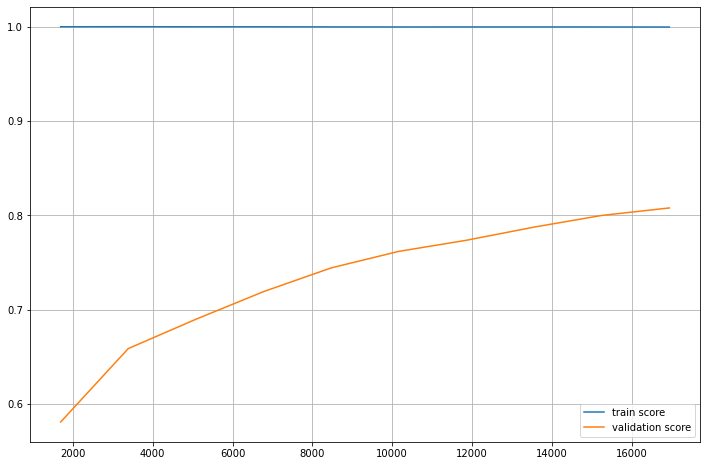

In [425]:
evaluation_threat(model=model)

# IV.3 - Optimisation du model et resultats

In [436]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_recall_curve

### GridSearchCV

In [437]:
hyper_params = {
    "decisiontreeclassifier__criterion" : ["gini", "entropy", "log_loss"],
    "decisiontreeclassifier__splitter" : ["best", "random"],
    "decisiontreeclassifier__max_depth" : range(150, 200),
    "decisiontreeclassifier__min_samples_split" : range(2, 6),
}
grid = GridSearchCV(model, hyper_params, cv = 5, scoring='accuracy')

In [441]:
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy", accuracy_score(y_test, y_pred))

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\

{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__splitter': 'best'}
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       872
           1       0.81      0.80      0.80       829
           2       0.83      0.85      0.84       777
           3       0.82      0.83      0.83       672
           4       0.86      0.83      0.85       628
           5       0.81      0.78      0.79       594
           6       0.86      0.89      0.87       581
           7       0.88      0.82      0.85       441
           8       0.79      0.78      0.79       161
           9       0.64      0.79      0.70        94

    accuracy                           0.84      5649
   macro avg       0.82      0.83      0.82      5649
weighted avg       0.84      0.84      0.84      5649

accuracy 0.8396176314391928


### RandomizedSearchCV

In [442]:
hyper_params = {
    "decisiontreeclassifier__criterion" : ["gini", "entropy", "log_loss"],
    "decisiontreeclassifier__splitter" : ["best", "random"],
    "decisiontreeclassifier__max_depth" : range(150, 200),
    "decisiontreeclassifier__min_samples_split" : range(2, 6),
    "pipeline__polynomialfeatures__degree" : range(1,4),
    "pipeline__selectkbest__k" : range(2, 6)
}
rand = RandomizedSearchCV(DecisionTree, hyper_params, cv = 5, scoring='accuracy', n_iter=200)

In [443]:
rand.fit(X_train, y_train)
print(rand.best_params_)
y_pred = rand.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy", accuracy_score(y_test, y_pred))

C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
430 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
365 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\AB

{'pipeline__selectkbest__k': 4, 'pipeline__polynomialfeatures__degree': 1, 'decisiontreeclassifier__splitter': 'best', 'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__max_depth': 192, 'decisiontreeclassifier__criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       872
           1       0.81      0.80      0.80       829
           2       0.83      0.85      0.84       777
           3       0.82      0.83      0.83       672
           4       0.86      0.83      0.85       628
           5       0.81      0.78      0.79       594
           6       0.86      0.89      0.87       581
           7       0.88      0.82      0.85       441
           8       0.79      0.78      0.79       161
           9       0.64      0.79      0.70        94

    accuracy                           0.84      5649
   macro avg       0.82      0.83      0.82      5649
weighted avg       0.84      0.84      

# IV.4 - Conclusion 
- les deux model nous offres les meme resultats avec une meme valeur de precission mais n'ont pas les meme temps d'execution
- Nous optons donc pour le RandomizedSearchCV pour sa vitesse 

# V - Model final et test 

In [455]:
rand.best_params_

{'pipeline__selectkbest__k': 4,
 'pipeline__polynomialfeatures__degree': 1,
 'decisiontreeclassifier__splitter': 'best',
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__max_depth': 192,
 'decisiontreeclassifier__criterion': 'entropy'}

In [456]:
model = rand.best_estimator_

In [457]:
averg_yields, averg_rain_fall, averg_pest, averg_temp = 23333, 1485.0, 121.0, 16.37
Labels = ["Potatoes", "Maize", "Wheat", "Rice, paddy", "Soybeans", "Sorghum", "Sweet potatoes", "Cassava", "Yams", "Plantains and others"]
inputs = [averg_yields, averg_rain_fall, averg_pest, averg_temp]
pred = Labels[model.predict([inputs])[0]]
print(pred)

Rice, paddy


C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


# V.1 - Test 

In [458]:
def predict(tupl):
    averg_yields, averg_rain_fall, averg_pest, averg_temp = tupl[0], tupl[1], tupl[2], tupl[3]
    Labels = ["Potatoes", "Maize", "Wheat", "Rice, paddy", "Soybeans", "Sorghum", "Sweet potatoes", "Cassava", "Yams", "Plantains and others"]
    inputs = [averg_yields, averg_rain_fall, averg_pest, averg_temp]
    pred = Labels[model.predict([inputs])[0]]
    print(pred)

In [461]:
liste = [(23333, 1485.0, 121.0, 16.37), (0, 0, 0, 0), (35045, 2585.25, 300.8, 19.5), (1, 1, 1, 1), (50000, 50000, 50000, 50000, 50000)]
for tupl in liste:
    print(f"-> {tupl}")
    predict(tupl)

-> (23333, 1485.0, 121.0, 16.37)
Rice, paddy
-> (0, 0, 0, 0)
Wheat
-> (35045, 2585.25, 300.8, 19.5)
Maize
-> (1, 1, 1, 1)
Wheat
-> (50000, 50000, 50000, 50000, 50000)
Rice, paddy


C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ABDEL FADIL\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
